In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_df = pd.merge(city_data, ride_data, how='outer', on='city')

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

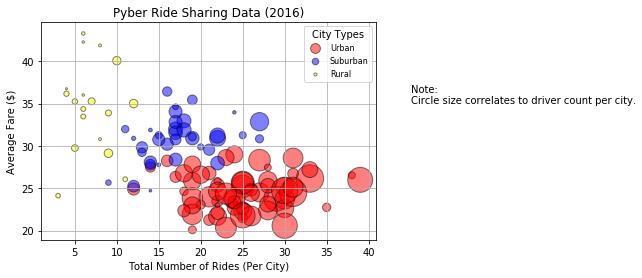

In [2]:
# Obtain the x and y coordinates for each of the three city types
combined_urban = combined_df.loc[combined_df["type"] == "Urban", :]
combined_suburban = combined_df.loc[combined_df["type"] == "Suburban", :]
combined_rural = combined_df.loc[combined_df["type"] == "Rural", :]

urban_rides = combined_urban.groupby(['city']).count()['ride_id']
suburban_rides = combined_suburban.groupby(['city']).count()['ride_id']
rural_rides = combined_rural.groupby(['city']).count()['ride_id']

urban_fare = combined_urban.groupby(['city'])['fare'].mean()
suburban_fare = combined_suburban.groupby(['city'])['fare'].mean()
rural_fare = combined_rural.groupby(['city'])['fare'].mean()

urban_driver = combined_urban.groupby(['city'])['driver_count'].sum()
suburban_driver = combined_suburban.groupby(['city'])['driver_count'].sum()
rural_driver = combined_rural.groupby(['city'])['driver_count'].sum()

# Build the scatter plots for each city types
# Incorporate a text label regarding circle size
plt.scatter(urban_rides, urban_fare, s=urban_driver/3, marker="o", facecolors="red", edgecolors="black", alpha=0.50)
plt.scatter(suburban_rides, suburban_fare, s=suburban_driver/2, marker="o", facecolors="blue", edgecolors="black", alpha= 0.50)
plt.scatter(rural_rides, rural_fare, s=rural_driver, marker="o", facecolors="yellow", edgecolors="black", alpha=0.50)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45, 35,"Note: \nCircle size correlates to driver count per city.")
plt.grid()

# Create a legend
plt.legend(("Urban", "Suburban", "Rural"), title='City Types', loc='best', fontsize=8, markerscale=0.5)

# Save Figure
plt.savefig("../Images/pyber_ride_sharing.png")
plt.show()

## Total Fares by City Type

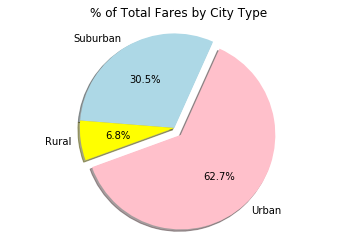

In [3]:
# Calculate Type Percents
combined_urban_fare = combined_urban["fare"].sum()
combined_suburban_fare = combined_suburban['fare'].sum()
combined_rural_fare = combined_rural["fare"].sum()

fares = [combined_urban_fare, combined_suburban_fare, combined_rural_fare]
colors = ["pink", "lightblue", "yellow"]
labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/percent_total_fares.png")
plt.show()

## Total Rides by City Type

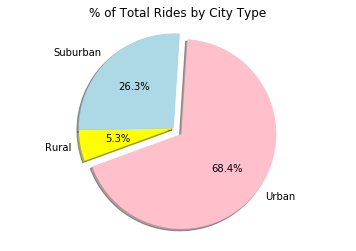

In [4]:
# Calculate Ride Percents
combined_urban_rides = combined_urban["ride_id"].count()
combined_suburban_rides = combined_suburban['ride_id'].count()
combined_rural_rides = combined_rural["ride_id"].count()

rides = [combined_urban_rides, combined_suburban_rides, combined_rural_rides]
colors = ["pink", "lightblue", "yellow"]
labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/percent_total_rides.png")
plt.show()

## Total Drivers by City Type

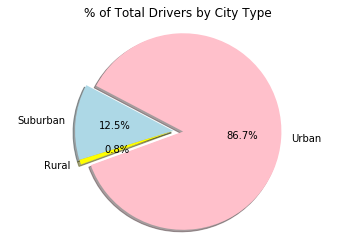

In [5]:
# Calculate Ride Percents
combined_urban_drivers = combined_urban["driver_count"].sum()
combined_suburban_drivers = combined_suburban["driver_count"].sum()
combined_rural_drivers = combined_rural["driver_count"].sum()

drivers = [combined_urban_drivers, combined_suburban_drivers, combined_rural_drivers]
colors = ["pink", "lightblue", "yellow"]
labels = ["Urban", "Suburban", "Rural"]
explode= (0.1, 0, 0)

# Build Pie Chart
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/percent_total_drivers.png")
plt.show()